<a href="https://colab.research.google.com/github/Moly-malibu/Convolutional-Neural-Network/blob/main/Neural_Network_Foundations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:**
- **Input Layer:**
- **Hidden Layer:**
- **Output Layer:**
- **Activation Function:**

## Neuron

"An artificial neuron (also referred to as a perceptron) is a mathematical function. It takes one or more inputs that are multiplied by values called “weights” and added together. This value is then passed to a non-linear function, known as an activation function, to become the neuron’s output". 

Neurons receive inputs, passing their signal (if activated) to the next layer if a certain threshold is reached.

## Input Layer: or Visible Layer: receives input dataset.

*Containt all the neurons that accept input for processing(1 neuron per feature)

*Process inputs into a format the hidden layers can use.

*inputs/features/columns of our dataset that will be passed to the network. 

The features being fed into the neural network.

## Hidden Layer: or Hidden Layers because they cannot be accessed except through the input layer.

*It can be more than 1.

*Transforms information from the input layer into a format the output layer can use.

*Brain of the neural network.

*Maps inputs to outputs

The hidden layer can be made up of multiple layers and is where most of the variation in architecture of an NN occurs. Intermediary nodes adjusted by weights.

## Output Layer: is the final layer and to output a vector of values.

*accepts processed data from hidden layers, scales/transforms/converts it into desired output format.

*NNs applied to a regression problem, single output node

*NNS applied to a binary classification problem, use a sigmoid function, function in order to squishify values down to represent a probability.

*NNS applied to multiclass classification problems,multiple output nodes. 

*Output is the prediction or classification given from network.

## Activation: 

Function that takes in a weighted sum and any biases and decides whether or not the neuron in question should be activated.  A neuron is activated according to one of many activation functions, such as tanh, relu, sigmoid, or linear. This would cause the neuron to send a signal on to the next neuron.


Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

# Backpropagation 

Algorithms are a family of methods used to efficiently train artificial neural networks (ANNs) following a gradient descent approach that exploits the chain rule, and is a short form for "backward propagation of errors." It is a standard method of training artificial neural networks. This method helps to calculate the gradient of a loss function with respect to all the weights in the network.

The neural network operates according to a loss function and it wants to minimize the loss, therefore it will keep iterating through the layers, according to a gradient.

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

#The process of making a prediction to get inputs to predicted output:
    
    1. Prepare a Training Dataset
        Inputs two numerical input variable
        outpus a classs label as either a 0 or 1
    2. Fit a model on the training dataset. the machine learning model
       takes inputs and makes a prediction.


  or

  1. Create basic neural network for the input, and takes an input, that modifies it by weight and report an output.
  2. Neural network predict based on the average and evaluate base algorithm and compare it actual to how far the model can go.

    

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [ ]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2) 
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [ ]:
from tensorflow.keras.utils import normalize
from sklearn.preprocessing import StandardScaler


model1 = Sequential()
model1.add(Dense(1, input_dim = 2, activation='sigmoid'))

model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

h1 = model1.fit(X,y, epochs=5, verbose=True)

Epoch 1/5
10/10 [==============================] - 0s 1ms/step - loss: 0.8694 - accuracy: 0.5333
Epoch 2/5
10/10 [==============================] - 0s 1ms/step - loss: 0.8507 - accuracy: 0.5367
Epoch 3/5
10/10 [==============================] - 0s 1ms/step - loss: 0.8385 - accuracy: 0.5333
Epoch 4/5
10/10 [==============================] - 0s 1ms/step - loss: 0.8543 - accuracy: 0.5333
Epoch 5/5
10/10 [==============================] - 0s 1ms/step - loss: 0.8510 - accuracy: 0.5300


### Multi-Layer Perceptron
Now construct a multi-layer perceptron using Keras. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. You must also monitor the metric 'accuracy'.

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [ ]:
model2 = Sequential()
model2.add(Dense(32, input_dim = 2, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='nadam',
               loss='binary_crossentropy',
               metrics = ['accuracy']) 

h2 = model2.fit(X, y, epochs=5, callbacks=[myCallback()], verbose=True)

Epoch 1/5
10/10 [==============================] - 0s 2ms/step - loss: 0.7080 - accuracy: 0.4733
Epoch 2/5
10/10 [==============================] - 0s 1ms/step - loss: 0.6694 - accuracy: 0.5433
Epoch 3/5
10/10 [==============================] - 0s 1ms/step - loss: 0.6289 - accuracy: 0.7600
Epoch 4/5
10/10 [==============================] - 0s 1ms/step - loss: 0.5971 - accuracy: 0.9000
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.9500


### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


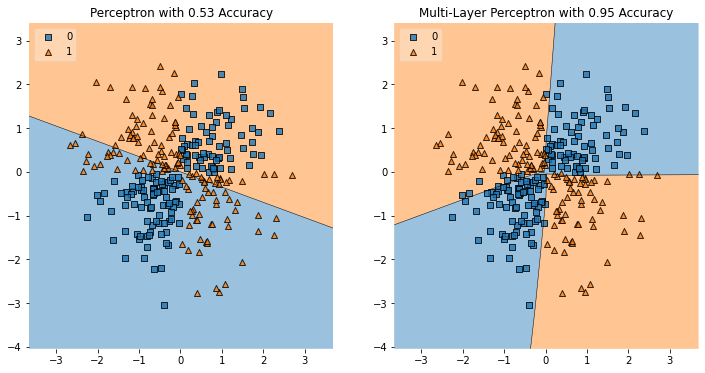

In [ ]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

We can conclude that the model one separate data linearly used sigmod activation, while multiple layers allow better recognition of more complex data patterns and development more complex process to help with keras. 

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.optimizers import SGD #Stochastic gradient descent optimizer.
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import MinMaxScaler, Normalizer, OrdinalEncoder

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1


In [ ]:
target = 'target'
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
features = df.drop(columns=target).columns

X = df[features].values
y = df[target].values

print('X', X.shape, type(X))
print('y', y.shape, type(y))

X (303, 13) <class 'numpy.ndarray'>
y (303,) <class 'numpy.ndarray'>


#Train your model and report its baseline accuracy.

In [ ]:
#Baseline Accuracy:

y_heart = df['target']
heart = df['target'].mode()[0]

#Do list Prediction length for the DataFrame
y_pred = [heart] * len(y_heart)

#Accuracy_score - baseline accuracy
from sklearn.metrics import accuracy_score
print("Baseline Accuracy:", accuracy_score(y_heart, y_pred))

Baseline Accuracy: 0.5445544554455446


In [ ]:
scaler = MinMaxScaler()
df_transform = scaler.fit_transform(df)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the values into X and y components:
X_train, X_test, y_train, y_test = train_test_split(df_transform[:, :-1], df_transform[:, -1], 
test_size=0.20, random_state=85)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 13) (61, 13) (242,) (61,)


In [ ]:
#Model 1
model = Sequential()

model.add(Dense(5, activation='relu', input_shape=(13,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',  
              optimizer=SGD(lr=0.1, momentum=0.9), 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=10, batch_size=20, verbose=1)

Train on 242 samples, validate on 61 samples
Epoch 1/10
242/242 [==============================] - 0s 364us/step - loss: 0.6989 - accuracy: 0.4959 - val_loss: 0.6287 - val_accuracy: 0.5574
Epoch 2/10
242/242 [==============================] - 0s 74us/step - loss: 0.6084 - accuracy: 0.6488 - val_loss: 0.4755 - val_accuracy: 0.8525
Epoch 3/10
242/242 [==============================] - 0s 77us/step - loss: 0.4877 - accuracy: 0.7893 - val_loss: 0.3165 - val_accuracy: 0.8525
Epoch 4/10
242/242 [==============================] - 0s 78us/step - loss: 0.5183 - accuracy: 0.7397 - val_loss: 0.3031 - val_accuracy: 0.8525
Epoch 5/10
242/242 [==============================] - 0s 80us/step - loss: 0.4668 - accuracy: 0.7727 - val_loss: 0.3186 - val_accuracy: 0.9016
Epoch 6/10
242/242 [==============================] - 0s 88us/step - loss: 0.5151 - accuracy: 0.7769 - val_loss: 0.4271 - val_accuracy: 0.8361
Epoch 7/10
242/242 [==============================] - 0s 82us/step - loss: 0.4202 - accuracy: 0.

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np

# Fixing random seed for reproducibility
seed = 85
np.random.seed(seed)

# Function to create model, required for KerasClassifier
def create_model():
  
  # create model
  model = Sequential()
  model.add(Dense(13, input_dim=13, activation='relu'))
  model.add(Dense(12, activation='sigmoid'))
  model.add(Dense(1, activation='sigmoid'))

  # compile model
  adam = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  print(model.summary())

  return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
#Fit model:
model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=50,
          batch_size=20,
          verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                168       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 363
Trainable params: 363
Non-trainable params: 0
_________________________________________________________________
None
Train on 242 samples, validate on 61 samples
Epoch 1/50
242/242 [==============================] - 0s 386us/step - loss: 0.6836 - accuracy: 0.5785 - val_loss: 0.6127 - val_accuracy: 0.8525
Epoch 2/50
242/242 [==============================] - 0s 86us/step - loss: 0.6118 - accuracy: 0.7603 - val_loss: 0.5236 - val_accuracy: 0.8361
Epoch 3/50
242/242 [=============================

In [ ]:
print(f"Accuracy: {accuracy_score(np.round(model.predict(X_test)),y_test)}")

Accuracy: 0.7540983606557377


In [ ]:
# Function to create model, required for KerasClassifier:
# define the grid search parameters

param_grid = {'batch_size': [32, 64, 128, 256, 512],
                'epochs': [100]}

def gridsearch_create_model():

  # create model
  model = Sequential()
  model.add(Dense(13, input_dim=13, activation='relu'))
  model.add(Dense(12, activation='sigmoid'))
  model.add(Dense(1, activation='sigmoid'))

  # compile model
  adam = Adam(lr=0.001, beta_1=0.9, 
              beta_2=0.999, 
              epsilon=1e-8)
  model.compile(loss='binary_crossentropy', 
                optimizer=adam, 
                metrics=['accuracy'])

  return model

  # create model
model2 = KerasClassifier(build_fn=gridsearch_create_model, verbose=0)

In [ ]:
# Create grid search
grid = GridSearchCV(estimator=model2, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print(f"Means: {mean}, Stdev: {stdev} with: {params}")

Best: 0.7847789168357849 using {'batch_size': 32, 'epochs': 100}
Means: 0.7847789168357849, Stdev: 0.05107309824926513 with: [{'batch_size': 32, 'epochs': 100}, {'batch_size': 64, 'epochs': 100}, {'batch_size': 128, 'epochs': 100}, {'batch_size': 256, 'epochs': 100}, {'batch_size': 512, 'epochs': 100}]
Means: 0.7766156554222107, Stdev: 0.05501220556715338 with: [{'batch_size': 32, 'epochs': 100}, {'batch_size': 64, 'epochs': 100}, {'batch_size': 128, 'epochs': 100}, {'batch_size': 256, 'epochs': 100}, {'batch_size': 512, 'epochs': 100}]
Means: 0.7725340127944946, Stdev: 0.03582548279217882 with: [{'batch_size': 32, 'epochs': 100}, {'batch_size': 64, 'epochs': 100}, {'batch_size': 128, 'epochs': 100}, {'batch_size': 256, 'epochs': 100}, {'batch_size': 512, 'epochs': 100}]
Means: 0.7142857193946839, Stdev: 0.11379603872921508 with: [{'batch_size': 32, 'epochs': 100}, {'batch_size': 64, 'epochs': 100}, {'batch_size': 128, 'epochs': 100}, {'batch_size': 256, 'epochs': 100}, {'batch_size': 

In [ ]:
#model 2

# define the grid search parameters
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
lr = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
neurons = [1, 5, 10, 15, 20, 25, 30]
batch_size = [5, 10, 50, 100]
epochs = [10]

param_grid = dict(batch_size=batch_size, epochs=epochs)

def create_model(momentum=0, lr=0, 
                 dropout_rate=0, 
                 kernel_initializer='normal'):
  
    optimizer = SGD(lr=lr, momentum=momentum)

    model = Sequential()
    model.add(Dense(30, input_shape=(13,),
                    kernel_initializer=kernel_initializer,
                    activation='sigmoid'))
    
    model.add(Dropout(dropout_rate))

    model.add(Dense(20, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1, kernel_initializer=kernel_initializer, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
#Fit model:
model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=50,
          batch_size=20,
          verbose=1)

Train on 242 samples, validate on 61 samples
Epoch 1/50
242/242 [==============================] - 0s 316us/step - loss: 0.6931 - accuracy: 0.5248 - val_loss: 0.6931 - val_accuracy: 0.5738
Epoch 2/50
242/242 [==============================] - 0s 76us/step - loss: 0.6931 - accuracy: 0.5248 - val_loss: 0.6931 - val_accuracy: 0.5738
Epoch 3/50
242/242 [==============================] - 0s 80us/step - loss: 0.6931 - accuracy: 0.5248 - val_loss: 0.6931 - val_accuracy: 0.5738
Epoch 4/50
242/242 [==============================] - 0s 84us/step - loss: 0.6931 - accuracy: 0.5248 - val_loss: 0.6931 - val_accuracy: 0.5738
Epoch 5/50
242/242 [==============================] - 0s 75us/step - loss: 0.6931 - accuracy: 0.5248 - val_loss: 0.6931 - val_accuracy: 0.5738
Epoch 6/50
242/242 [==============================] - 0s 75us/step - loss: 0.6931 - accuracy: 0.5248 - val_loss: 0.6931 - val_accuracy: 0.5738
Epoch 7/50
242/242 [==============================] - 0s 81us/step - loss: 0.6931 - accuracy: 0.

In [ ]:
#statisti: 2
#Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train, y_train)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.48741496205329893 using {'batch_size': 50, 'epochs': 10}
Means: 0.4343537390232086, Stdev: 0.050968367558376144 with: {'batch_size': 5, 'epochs': 10}
Means: 0.44268707036972044, Stdev: 0.06018665899217808 with: {'batch_size': 10, 'epochs': 10}
Means: 0.48741496205329893, Stdev: 0.08215121966032414 with: {'batch_size': 50, 'epochs': 10}
Means: 0.48741496205329893, Stdev: 0.08215121966032414 with: {'batch_size': 100, 'epochs': 10}
